4 columnas numéricas

* price
* bedrooms
* bathrooms
* m2
* address (quitarle lo de ", Madrid" con numpy)

En cada apartado hacer visualizaciones con matplotlib o seaborn.

* 25 %:

* Carga de datos: cargarlo con np.genfromtext usar encoding="utf-8"
* Media, mediana
* Máximo y mínimo
* histograma y curva de densidad

* 25 %

* Cuartiles: Q1 (25), Q2 (50), Q3 (75)
* IQR
* Filtrar 20 % más caro, y el 20 % más barato
* Opcional: filtrar los barrios 20 % más baratos
* Moda: calcular moda también de address
* Opcional: Moda de los barrios más baratos y más caros
* Dispersión: varianza y desviación estándar

25 % 

* Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.
* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

25 % 

* Asimetría y curtosis
* Transformar distribuciones e interpretar resultados
* Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños


Entrega: 27/12

### IMPORTACION LIBRERIAS NECESARIAS

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl
import seaborn as sns
from collections import Counter

### IMPORTACION DE LAS COLUMNAS DE LOS ARCHIVOS

In [66]:
price = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (0), dtype = int, delimiter = ",", skip_header = 1, encoding = "utf_8" )
baths = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (1), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
roms = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (2), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
meters = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (3), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
address = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (4), dtype = str, delimiter =",", skip_header = 1, encoding = "utf_8" )

### MEDIAS, MEDIANAS, MAXIMOS Y MINIMOS

In [67]:

# Media
print("MEDIAS")
print(f"El coste medio de las viviendas es: {np.mean(price):.2f}")
print(f"La media de baños es: {np.mean(baths):.2f}")
print(f"La media de habitaciones es: {np.mean(roms):.2f}")
print(f"La media de metros cuadrados es: {np.mean(meters):.2f}\n")

# Mediana
print("MEDIANAS")
print(f"La mediana del precio es: {np.median(price):.2f}")
print(f"La mediana de los baños es: {np.median(baths):.0f}")
print(f"La mediana de las habitaciones es: {np.median(roms):.0f}")
print(f"La mediana de metros cuadrados es: {np.median(meters):.2f}\n")

# Máximo y mínimo
print("MAXIMOS")
print(f"La casa mas cara tiene un coste de: {np.max(price):.2f}")
print(f"La casa que mas baños tiene posee: {np.max(baths):.2f}")
print(f"La casa que mas habitaciones tiene posee: {np.max(roms):.2f}")
print(f"La casa que mas metros cuadrados tiene posee: {np.max(meters):.2f}\n")

print("MINIMOS")
print(f"La casa mas economica tiene un coste de: {np.min(price)}")
print(f"La casa que menos baños posee tiene: {np.min(baths)}")
print(f"La casa que menos habitaciones posee tiene: {np.min(roms)}")
print(f"La casa que menos metros cuadrados posee tiene: {np.min(meters)}\n")

MEDIAS
El coste medio de las viviendas es: 1290575.26
La media de baños es: 2.90
La media de habitaciones es: 3.47
La media de metros cuadrados es: 217.24

MEDIANAS
La mediana del precio es: 990000.00
La mediana de los baños es: 3
La mediana de las habitaciones es: 3
La mediana de metros cuadrados es: 158.00

MAXIMOS
La casa mas cara tiene un coste de: 8900000.00
La casa que mas baños tiene posee: 12.00
La casa que mas habitaciones tiene posee: 12.00
La casa que mas metros cuadrados tiene posee: 1768.00

MINIMOS
La casa mas economica tiene un coste de: 122000
La casa que menos baños posee tiene: 1
La casa que menos habitaciones posee tiene: 0
La casa que menos metros cuadrados posee tiene: 14



### HISTOGRAMAS Y CURVAS DE DENSIDAD

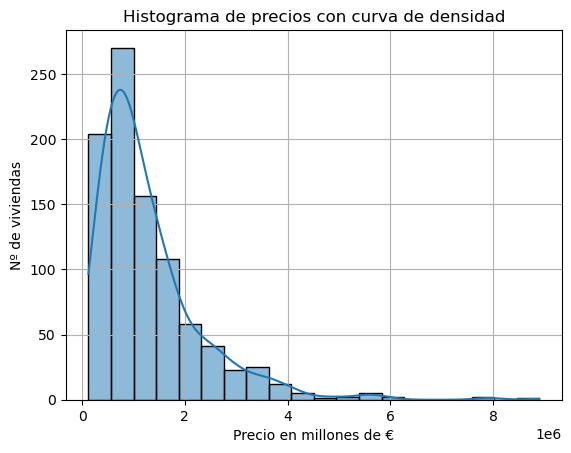

In [68]:
# histograma y curva de densidad
sns.histplot(price, kde=True, bins=20,);
plt.title("Histograma de precios con curva de densidad")
plt.xlabel("Precio en millones de €")
plt.ylabel("Nº de viviendas")
plt.grid()

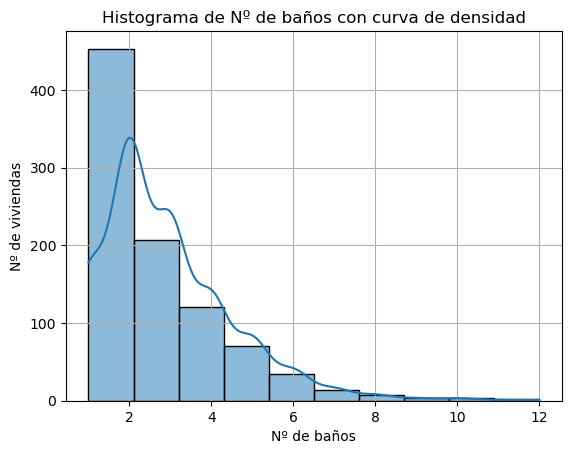

In [69]:
sns.histplot(baths, kde=True, bins=10,);
plt.title("Histograma de Nº de baños con curva de densidad")
plt.xlabel("Nº de baños")
plt.ylabel("Nº de viviendas")
plt.grid()

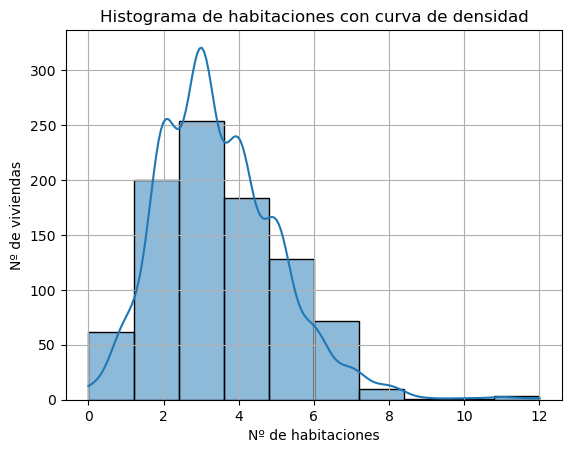

In [70]:
sns.histplot(roms, kde=True, bins=10,);
plt.title("Histograma de habitaciones con curva de densidad")
plt.xlabel("Nº de habitaciones")
plt.ylabel("Nº de viviendas")
plt.grid()

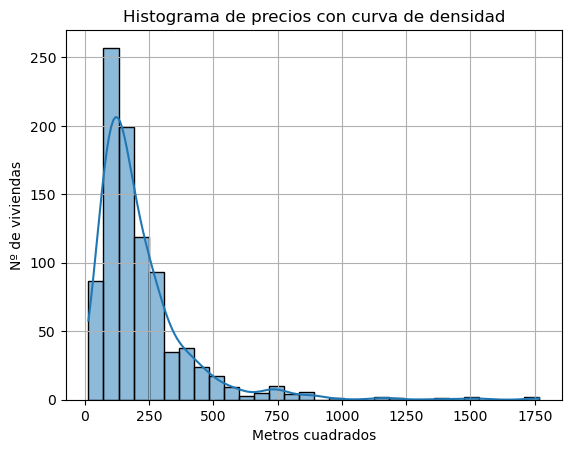

In [71]:
sns.histplot(meters, kde=True, bins=30,);
plt.title("Histograma de precios con curva de densidad")
plt.xlabel("Metros cuadrados")
plt.ylabel("Nº de viviendas")
plt.grid()

### CUARTILES (Q1, Q2, Q3)

In [72]:
print("Q1")
print(np.quantile(a = price, q = 0.25, interpolation = "lower"))
print(np.quantile(a = baths, q = 0.25, interpolation = "lower"))
print(np.quantile(a = roms, q = 0.25, interpolation = "lower"))
print(np.quantile(a = meters, q = 0.25, interpolation = "lower"))

Q1
625000
2
2
104


In [73]:
print("Q2")
print(np.quantile(a = price, q = 0.5, interpolation = "lower"))
print(np.quantile(a = baths, q = 0.5, interpolation = "lower"))
print(np.quantile(a = roms, q = 0.5, interpolation = "lower"))
print(np.quantile(a = meters, q = 0.5, interpolation = "lower"))

Q2
990000
3
3
158


In [74]:
print("Q3")
print(np.quantile(a = price, q = 0.75, interpolation = "lower"))
print(np.quantile(a = baths, q = 0.75, interpolation = "lower"))
print(np.quantile(a = roms, q = 0.75, interpolation = "lower"))
print(np.quantile(a = meters, q = 0.75, interpolation = "lower"))

Q3
1650000
4
4
264


### IQR

In [75]:
print("IQR Price")
Q1 = np.quantile(a = price, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = price, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

IQR Price
1025000


In [76]:
print("IQR Baths")
Q1 = np.quantile(a = baths, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = baths, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

IQR Baths
2


In [77]:
print("IQR Roms")
Q1 = np.quantile(a = roms, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = roms, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

IQR Roms
2


In [78]:
print("IQR Meters")
Q1 = np.quantile(a = meters, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = meters, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

IQR Meters
160


### FILTRAR 20 % MAS CARO, Y EL 20 % MAS BARATO

In [79]:
percentil_price_20 = np.percentile(price, 20)
porcentaje_20_price = price[price <= percentil_price_20]

print("Precio del 20% de viviendas mas economicas")
print(porcentaje_20_price)

Precio del 20% de viviendas mas economicas
[470000 475000 380000 325000 320000 238000 425000 233000 330000 529900
 359000 515000 378000 164000 410000 330000 517000 490000 435000 399000
 430000 450000 460000 338000 132000 439000 250000 442327 485000 345000
 400000 315000 500000 375000 369000 385000 525000 229000 260000 499000
 410000 199000 525000 529900 267000 260000 475000 319000 510000 475000
 250000 420000 317000 350000 475000 385000 515000 450000 365900 249900
 269900 385000 214900 349000 345000 290000 480000 335000 260000 145000
 279000 179000 299000 339000 404000 285000 525000 388000 180000 388000
 265000 388000 309000 262500 203000 460000 375000 329900 450000 299000
 390000 288000 300000 150000 389000 320000 425000 380000 464000 239900
 375000 299000 470000 370000 125000 520000 155000 498000 140000 369000
 370000 475000 299000 500000 270000 137000 253000 334740 155000 259000
 430000 350000 240000 300000 435000 485000 345000 255900 430000 445000
 169000 229900 420000 270000 29900

In [80]:
percentil_baths_20 = np.percentile(baths, 20)
porcentaje_20_baths= baths[baths <= percentil_baths_20]

print("Nº de baños del 20% que menos tienen")
print(porcentaje_20_baths)

Nº de baños del 20% que menos tienen
[2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 1 1 1
 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 1 2 2 2 1 2
 1 2 2 1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 2 2 1 1 2 1
 1 1 2 1 2 1 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 1
 2 1 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 1 2 2
 2 1 1 2 2 2 1 2 2 1 2 2 1 2 1 1 2 1 1 2 1 2 1 1 2 2 2 1 1 2 1 2 2 1 2 2 2
 1 1 2 1 1 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 2 1
 2 2 1 1 2 2 2 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 1 2 1 2 1 1 2 1 2 2 2
 2 1 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2 1
 1 2 2 2 2 2 2 2 2]


In [81]:
percentil_roms_20 = np.percentile(roms, 20)
porcentaje_20_roms= roms[roms <= percentil_roms_20]

print("Nº de habitaciones del 20% que menos tienen")
print(porcentaje_20_roms)

Nº de habitaciones del 20% que menos tienen
[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1
 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 1 2 2 2 1 1
 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 1
 1 1 2 1 2 2 2 2 2 2 2 0 2 1 2 1 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 2 2
 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 2 0 2 1 0 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [82]:
percentil_meters_20 = np.percentile(meters, 20)
porcentaje_20_meters= meters[meters <= percentil_meters_20]

print("Metros del 20% que menos tienen")
print(porcentaje_20_meters)

Metros del 20% que menos tienen
[95 75 76 97 91 52 93 51 91 69 40 60 88 74 86 78 67 68 57 80 87 82 75 76
 94 67 46 78 45 97 73 91 48 65 96 92 75 83 92 78 88 88 14 89 88 39 66 72
 50 83 75 40 46 73 87 60 79 74 97 79 62 70 85 56 70 80 55 96 70 60 54 92
 70 75 71 41 87 67 91 61 92 61 97 69 76 45 63 47 80 78 68 64 52 75 70 24
 96 66 80 50 73 58 53 66 61 91 86 62 43 84 56 75 61 56 78 80 68 80 88 74
 54 82 74 79 73 89 86 42 93 91 36 75 58 57 53 59 88 42 84 74 70 76 51 84
 94 48 70 71 81 75 51 61 61 90 73 60 96 89 91 62 70 60 50 96 80 38 74 70
 75 25 62 54 93 81 88 76 69 88 64 81 61 66 62 82 76 89]


In [83]:
percentil_price_80 = np.percentile(price, 80)
porcentaje_80_price = price[price >= percentil_price_80]

print("Precio del 80% de viviendas mas caras")
print(porcentaje_80_price)

Precio del 80% de viviendas mas caras
[1920000 1995000 5700000 2190000 3950000 3900000 1970000 4950000 7900000
 2450000 1850000 1850000 2300000 1950000 2100000 5500000 1900000 3000000
 1950000 2800000 2600000 2275000 2300000 2800000 3500000 2950000 2800000
 3550000 2575000 2500000 3200000 3500000 3500000 2300000 2200000 2190000
 1900000 2395000 2390000 2990000 2000000 2770000 1850000 2150000 1850000
 1850000 4300000 2100000 1950000 2200000 2225000 5500000 3600000 3900000
 1980000 2450000 2700000 1920000 5000000 2390000 2700000 3700000 3600000
 2100000 2290000 2500000 2300000 2100000 3600000 5900000 4200000 2575000
 2200000 2690000 3600000 3000000 3000000 2500000 3500000 3950000 2500000
 1950000 2075000 2750000 5500000 1990000 2690000 2690000 2600000 2095000
 4200000 2500000 8900000 3465000 3100000 1950000 2950000 2200000 2300000
 3700000 1850000 1995000 3700000 3490000 2290000 2580000 3950000 2500000
 3200000 2900000 3200000 3250000 2700000 2300000 2950000 2190000 1850000
 5900000 3100

In [84]:
percentil_baths_80 = np.percentile(baths, 80)
porcentaje_80_price = baths[baths >= percentil_baths_80]

print("Nº de baños del 20% que mas tienen")
print(porcentaje_80_price)

Nº de baños del 20% que mas tienen
[ 4  5  4  5  5  4  7  4  4  5  5  5  5  4  4  7  5  4  7  6  4  4  4  5
  5  6  4  5  4  5  4  5  5  5  6  6  6  8  6  5  4  9  4  4  5  5  4  5
  4  4  5  6  7  5  4  5  4  5  6  4  4  4  5  4  6  5  5  4  4  4  6  6
  4  5  5  4  4  5  4  4  4  4  4  5  6  5  5  6  4  4  4  4  4  4  7  4
  4  4  7  5  4  6  7  7  4  4  4  4  5  7  4  7  4  5  8  4  4  5  4  4
  5  8  4  6  4 11  4  5  6  4 10  5  5  5  4  4  4  6  5  5  4  6  5  4
  5  4  5  4  4  8  5  4  4  4  5  4  4  4  8  4  8  4  4  5  4  6  4  4
  5  6  5  4  4  5  4  4  4  5  5  4  4  5  7  4  4  4  6  5  4  4  6  5
  6  4  6  4  5  4  4  4  6  8  9 10  6  4  4  4  6  5  4  5  5  6  5  4
  5  5  4  7  4  5 12  6  7  6  6  5  5  4  4 10  4  9  4  6  4  4  7  4
  4  4  4  4  5  5  6  6  6  5  4  4  4  5  4]


In [85]:
percentil_roms_80 = np.percentile(roms, 80)
porcentaje_80_roms = roms[roms >= percentil_roms_80]

print("Nº de habitaciones del 80% que mas tienen")
print(porcentaje_80_roms)

Nº de habitaciones del 80% que mas tienen
[ 5  5  6  5  5  5  5  5  8  6  5  6  7  5  6  6  5  6  5  5  5  5  5  5
  7  5  5  6  7  8  5  5  8  5  5  6  6  5  5  7  5  6  5  5  6  5  5  5
  5  6  5  5 10  5  5  5  5  5  6  5  5  5  5  6  5  8  5  6  6  5  5  5
  7  5  5  5  7  5  5  5  5  5  5  8  5  7  6  5  5  6  6  8  5  5  7  5
  5  5  5  5  5  5  5 11  5  5  6  5  5  6 12  9  6  5  6  5  6  5  5  6
  5  8  8  7  5  5  5  5  5  5  5  5  7  5  6  5  6  5  6  5  7  5  6  5
  5  7  6  5  5  5  5  7  7  6  5  6  7  5  7  5  6  5  7  6  5  5  7  7
  7  5  5  5  6  6  6  5  5  6  6  7  5  6  6  5  5  5 11  5  8  5  6  6
  6  6  5  8  5  5  5  5  6  5  5  5  5  5  7  6  5  6  5  6  5  5  6]


In [86]:
percentil_meters_80 = np.percentile(meters, 80)
porcentaje_80_meters = meters[meters >= percentil_meters_80]

print("Metros del 80% de viviendas que mas tienen")
print(porcentaje_80_meters)

Metros del 80% de viviendas que mas tienen
[ 360  305  886  367  473  306  438  300  485  450  334 1150  372  488
  452  399  360  367  300  348  368 1525  388  580  605  780  720  443
  360  306  414  410  890 1500  450  352  400  400  370  302  440  297
  400  302  297  451  481  315  299  379  304  447  442  430  358  694
  430  800  392  360  340  875  745  308  336  746  881  862  738  484
  510  650  313  300 1150  421  387  413  450  459  388  404  500  346
  360  363  713  293 1380  750  601  700  320  533  310  407  530  302
  430  383  300  725  463  596  307  596  300  350  730  395  881  573
  314  510  593  460  407  530  334  343  370  380  430  413  334  390
  573  367  316  370  540  300  555  302  376  484  400  524  427  325
  457  780 1200  749  452  440  540  302  489  305  320  595  399 1768
  500  728  969  533  781  340  382  761 1768  700  300  575  372  660
  320  337  399  334  345  360  420  305  307  482  375  314  376  473
  293]


### MODA

In [87]:
cont_price = Counter(price)
cont_price.items()

# Precios más frecuentes
cont_price.most_common(5)

[(850000, 15), (1200000, 14), (2500000, 13), (1300000, 12), (1650000, 12)]

In [88]:
# Precios menos frecuentes
cont_price_min = sorted(cont_price.items(), key = lambda item: item[1])
cont_price_min [:5]

[(1590750, 1), (5700000, 1), (752248, 1), (1295000, 1), (1970000, 1)]

In [89]:
cont_baths = Counter(baths)
cont_baths.items()

# Nº de baños más frecuentes
cont_baths.most_common(5)

[(2, 301), (3, 207), (1, 152), (4, 120), (5, 71)]

In [90]:
# Nº de baños menos frecuentes
cont_baths_min = sorted(cont_baths.items(), key = lambda item: item[1])
cont_baths_min [:5]

[(11, 1), (12, 1), (9, 3), (10, 3), (8, 7)]

In [91]:
cont_roms = Counter(roms)
cont_baths.items()

# Nº de habitaciones más frecuentes
cont_roms.most_common(5)

[(3, 254), (2, 200), (4, 184), (5, 128), (1, 54)]

In [92]:
# Nº de habitaciones menos frecuentes
cont_roms_min = sorted(cont_roms.items(), key = lambda item: item[1])
cont_roms_min [:5]

[(10, 1), (12, 1), (9, 1), (11, 2), (0, 8)]

In [93]:
cont_meters = Counter(meters)
cont_meters.items()

# Nº de metros más frecuentes
cont_meters.most_common(5)

[(133, 12), (150, 12), (104, 11), (120, 11), (75, 10)]

In [94]:
# Nº de metros menos frecuentes
cont_meters_min = sorted(cont_meters.items(), key = lambda item: item[1])
cont_meters_min [:5]

[(886, 1), (261, 1), (438, 1), (485, 1), (95, 1)]

In [95]:
cont_address = Counter(address)
cont_address.items()

# Barrios más frecuentes
cont_address.most_common(5)

[('Barrio de Salamanca', 63),
 ('Hortaleza', 60),
 ('Chamartín', 54),
 ('Moncloa', 48),
 ('Centro', 47)]

In [96]:
cont_address_min = sorted(cont_address.items(), key = lambda item: item[1])
cont_address_min [:5]

[('Comillas', 1),
 ('Bellas Vistas', 1),
 ('Pau de Carabanchel', 1),
 ('Zofío', 1),
 ('Legazpi', 1)]

### Dispersión: varianza y desviación estándar

In [97]:
# Varianza en los precios
np.var(price)

1073448095137.2623

In [98]:
# Desviacion estandar en los precios
np.std(price)

1036073.4023886833

In [99]:
# Varianza en los baños
np.var(baths)

2.6425680074054165

In [100]:
# Desviacion estandar en los baños
np.std(baths)

1.625597738496648

In [101]:
# Varianza en las habitaciones
np.var(roms)

2.540050762937084

In [102]:
# Desviacion estandar en las habitaciones
np.std(roms)

1.5937536707211326

In [103]:
# Varianza en los metros
np.var(meters)

36726.2798483084

In [104]:
# Desviacion estandar en los metros
np.std(meters)

191.64101817802054

### FILTRO DE OUTLIERS (Z-SCORE Y GRAFICO DE OUTLIERS)

In [105]:
# Z-Score Precios
def prices_z_score(price, z = 3):
    
    # Media y estandar
    prices_mean = np.mean(price)
    prices_std = np.std(price)
    
    # Limites laterales
    limit_l_prices = prices_mean - z*prices_std
    limit_r_prices = prices_mean + z*prices_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    price_out = [pri for pri in price if pri < limit_l_prices or pri > limit_r_prices]
    
    # Filtrmos los precios que no son outliers
    norm_price = [pri for pri in price if pri not in price_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_price), np.array(price_out)

norm_price, price_out = prices_z_score(price)
print(f"Nº total de no-outliers: {len(norm_price)}")
print(f"Total de outliers: {len(price_out)}\n")

print("Estos son los outliers")
print(price_out)

Nº total de no-outliers: 901
Total de outliers: 14

Estos son los outliers
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


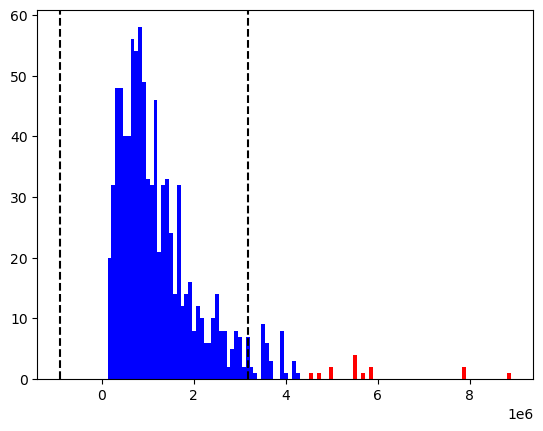

In [106]:
# Grafico outlayers precio
q1_price = np.quantile(price, 0.25)
q3_price = np.quantile(price, 0.75)
ric_price = q3_price - q1_price

lim_l_price = q1_price - 1.5*ric_price
lim_r_price = q3_price + 1.5*ric_price

# No-Outliers
plt.hist(norm_price, bins = 50, color = "blue")

# Outliers
plt.hist(price_out, bins = 50, color = "red")

# Q1
plt.axvline(lim_l_price, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_price, color = "black", linestyle = "--")

plt.show()

In [107]:
# Z-Score Baños
def baths_z_score(baths, z = 3):
    
    # Media y estandar
    baths_mean = np.mean(baths)
    baths_std = np.std(baths)
    
    # Limites laterales
    limit_l_baths = baths_mean - z*baths_std
    limit_r_baths = baths_mean + z*baths_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    baths_out = [bath for bath in baths if bath < limit_l_baths or bath > limit_r_baths]
    
    # Filtrmos los precios que no son outliers
    norm_baths = [bath for bath in baths if bath not in baths_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_baths), np.array(baths_out)

norm_baths, baths_out = baths_z_score(baths)
print(f"Nº total de no-outliers: {len(norm_baths)}")
print(f"Total de outliers: {len(baths_out)}\n")

print("Estos son los outliers")
print(baths_out)

Nº total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  9  8  8 11 10  8  8  8  8  9 10 12 10  9]


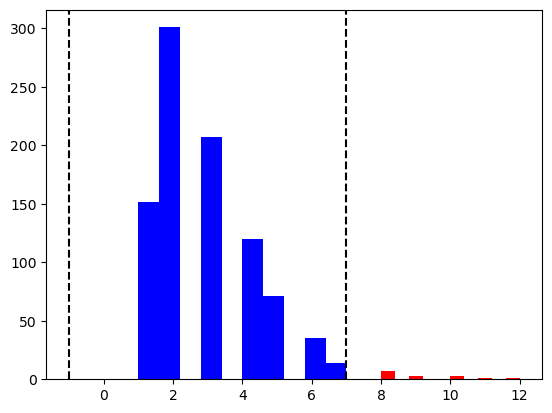

In [108]:
# Grafico outlayers baños
q1_baths = np.quantile(baths, 0.25)
q3_baths = np.quantile(baths, 0.75)
ric_baths = q3_baths - q1_baths

lim_l_baths = q1_baths - 1.5*ric_baths
lim_r_baths = q3_baths + 1.5*ric_baths

# No-Outliers
plt.hist(norm_baths, bins = 10, color = "blue")

# Outliers
plt.hist(baths_out, bins = 10, color = "red")

# Q1
plt.axvline(lim_l_baths, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_baths, color = "black", linestyle = "--")

plt.show()

In [109]:
# Z-Score Habitaciones
def roms_z_score(roms, z = 3):
    
    # Media y estandar
    roms_mean = np.mean(roms)
    roms_std = np.std(roms)
    
    # Limites laterales
    limit_l_roms = roms_mean - z*roms_std
    limit_r_roms = roms_mean + z*roms_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    roms_out = [rom for rom in roms if rom < limit_l_roms or rom > limit_r_roms]
    
    # Filtrmos los precios que no son outliers
    norm_roms = [rom for rom in roms if rom not in roms_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_roms), np.array(roms_out)

norm_roms, roms_out = roms_z_score(roms)
print(f"Nº total de no-outliers: {len(norm_roms)}")
print(f"Total de outliers: {len(roms_out)}\n")

print("Estos son los outliers")
print(roms_out)

Nº total de no-outliers: 910
Total de outliers: 5

Estos son los outliers
[10 11 12  9 11]


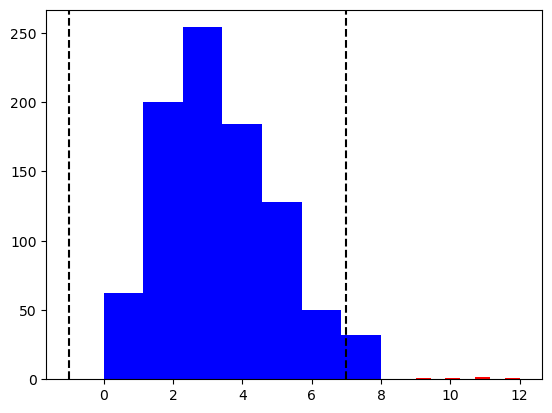

In [110]:
# Grafico outlayers habitaciones
q1_roms = np.quantile(roms, 0.25)
q3_roms = np.quantile(roms, 0.75)
ric_roms = q3_roms - q1_roms

lim_l_roms = q1_roms - 1.5*ric_roms
lim_r_roms = q3_roms + 1.5*ric_roms

# No-Outliers
plt.hist(norm_roms, bins = 7, color = "blue")

# Outliers
plt.hist(roms_out, bins = 7, color = "red")

# Q1
plt.axvline(lim_l_roms, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_roms, color = "black", linestyle = "--")

plt.show()

In [111]:
# Z-Score Metros
def meters_z_score(meters, z = 3):
    
    # Media y estandar
    meters_mean = np.mean(meters)
    meters_std = np.std(meters)
    
    # Limites laterales
    limit_l_meters = meters_mean - z*meters_std
    limit_r_meters = meters_mean + z*meters_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    meters_out = [meter for meter in meters if meter < limit_l_meters or meter > limit_r_meters]
    
    # Filtrmos los precios que no son outliers
    norm_meters = [meter for meter in meters if meter not in meters_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_meters), np.array(meters_out)

norm_meters, meters_out = roms_z_score(meters)
print(f"Nº total de no-outliers: {len(norm_meters)}")
print(f"Total de outliers: {len(meters_out)}\n")

print("Estos son los outliers")
print(meters_out)

Nº total de no-outliers: 899
Total de outliers: 16

Estos son los outliers
[ 886 1150 1525  890 1500  800  875  881  862 1150 1380  881 1200 1768
  969 1768]


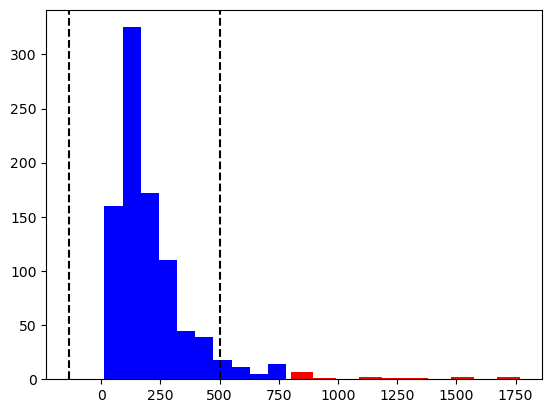

In [112]:
# Grafico outlayers metros
q1_meters = np.quantile(meters, 0.25)
q3_meters = np.quantile(meters, 0.75)
ric_meters = q3_meters - q1_meters

lim_l_meters = q1_meters - 1.5*ric_meters
lim_r_meters = q3_meters + 1.5*ric_meters

# No-Outliers
plt.hist(norm_meters, bins = 10, color = "blue")

# Outliers
plt.hist(meters_out, bins = 10, color = "red")

# Q1
plt.axvline(lim_l_meters, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_meters, color = "black", linestyle = "--")

plt.show()

* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

### FILTRO DE OUTLIERS (TUKEY)

In [113]:
# Tukey precio

def out_price_tukey(price, k = 1.5):
    
    # Calculamos los cuartiles Q1 y Q3
    q1_price_tukey = np.quantile(price, 0.25)
    q3_price_tukey = np.quantile(price, 0.75)
    
    # Rango InterCuartil
    ric_price_tukey = q3_price_tukey - q1_price_tukey
    
    # Calculamos los límites laterales
    lim_l_price_tukey = q1_price_tukey - k*ric_price_tukey
    lim_r_price_tukey = q3_price_tukey + k*ric_price_tukey
    
    # Filtramos los elementos del array, los que esten fuera de los limites laterales.
    outli_price_tukey = [out for out in price if out < lim_l_price_tukey or out > lim_r_price_tukey]
    
    
    # Filtramos los elementos del array, los que no pertenezcan a outliers.
    norm_price_tukey = [out for out in price if out not in outli_price_tukey]
    
    # Retornamos ambos arrays, uno con los datos sin outliers, otro con los outliers
    return np.array(norm_price_tukey), np.array(outli_price_tukey)

norm_price_tukey, outli_price_tukey = out_price_tukey(price)

print(f"Total de no-outliers: {len(norm_price_tukey)}")
print(f"Total de outliers: {len(outli_price_tukey)}\n")

print("Estos son los outliers")
print(outli_price_tukey)

Total de no-outliers: 860
Total de outliers: 55

Estos son los outliers
[5700000 3950000 3900000 4950000 7900000 5500000 3500000 3550000 3200000
 3500000 3500000 4300000 5500000 3600000 3900000 5000000 3700000 3600000
 3600000 5900000 4200000 3600000 3500000 3950000 5500000 4200000 8900000
 3465000 3700000 3700000 3490000 3950000 3200000 3200000 3250000 5900000
 3200000 3950000 3195000 3950000 3200000 3600000 4500000 3500000 4200000
 5500000 3500000 4750000 3500000 3195000 4000000 3250000 3300000 3950000
 7900000]


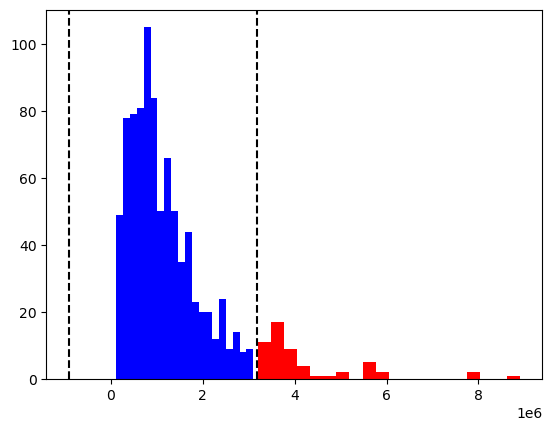

In [114]:
# Grafico outliers tukey precio 

# Calculamos los cuartiles Q1 y Q3
q1_price_tukey = np.quantile(price, 0.25)
q3_price_tukey = np.quantile(price, 0.75)
    
# Rango InterCuartil
ric_price_tukey = q3_price_tukey - q1_price_tukey
    
# Calculamos los límites laterales
lim_l_price_tukey = q1_price_tukey - 1.5*ric_price_tukey
lim_r_price_tukey = q3_price_tukey + 1.5*ric_price_tukey


# No-Outliers
plt.hist(norm_price_tukey, bins = 20, color = "blue")

# Outliers
plt.hist(outli_price_tukey, bins = 20, color = "red")

# Q1 - 1.5*ric
plt.axvline(lim_l_price_tukey, color = "black", linestyle = "--")

# Q3 + 1.5*ric
plt.axvline(lim_r_price_tukey, color = "black", linestyle = "--")

plt.show()

In [115]:
# Tukey baños

def out_baths_tukey(baths, k = 1.5):
    
    q1_baths_tukey = np.quantile(baths, 0.25)
    q3_baths_tukey = np.quantile(baths, 0.75)
    
    ric_baths_tukey = q3_baths_tukey - q1_baths_tukey
    
    lim_l_baths_tukey = q1_baths_tukey - k*ric_baths_tukey
    lim_r_baths_tukey = q3_baths_tukey + k*ric_baths_tukey
    
    outli_baths_tukey = [out for out in baths if out < lim_l_baths_tukey or out > lim_r_baths_tukey]
    
    norm_baths_tukey = [out for out in baths if out not in outli_baths_tukey]
    
    return np.array(norm_baths_tukey), np.array(outli_baths_tukey)

norm_baths_tukey, outli_baths_tukey = out_baths_tukey(baths)

print(f"Total de no-outliers: {len(norm_baths_tukey)}")
print(f"Total de outliers: {len(outli_baths_tukey)}\n")

print("Estos son los outliers")
print(outli_baths_tukey)

Total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  9  8  8 11 10  8  8  8  8  9 10 12 10  9]


In [116]:
# Grafico outliers tukey baños

In [117]:
# Tukey habitaciones

def out_roms_tukey(roms, k = 1.5):
    
    q1_roms_tukey = np.quantile(roms, 0.25)
    q3_roms_tukey = np.quantile(roms, 0.75)
    
    ric_roms_tukey = q3_roms_tukey - q1_roms_tukey
    
    lim_l_roms_tukey = q1_roms_tukey - k*ric_roms_tukey
    lim_r_roms_tukey = q3_roms_tukey + k*ric_roms_tukey
    
    outli_roms_tukey = [out for out in roms if out < lim_l_roms_tukey or out > lim_r_roms_tukey]
    
    norm_roms_tukey = [out for out in roms if out not in outli_roms_tukey]
 
    return np.array(norm_roms_tukey), np.array(outli_roms_tukey)

norm_roms_tukey, outli_roms_tukey = out_price_tukey(roms)

print(f"Total de no-outliers: {len(norm_roms_tukey)}")
print(f"Total de outliers: {len(outli_roms_tukey)}\n")

print("Estos son los outliers")
print(outli_roms_tukey)

Total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  8  8 10  8  8  8 11 12  9  8  8 11  8  8]


In [118]:
# Grafico outliers tukey habitaciones

In [119]:
# Tukey metros

def out_meters_tukey(meters, k = 1.5):

    q1_meters_tukey = np.quantile(meters, 0.25)
    q3_meters_tukey = np.quantile(meters, 0.75)

    ric_meters_tukey = q3_meters_tukey - q1_meters_tukey

    lim_l_meters_tukey = q1_meters_tukey - k*ric_meters_tukey
    lim_r_meters_tukey = q3_meters_tukey + k*ric_meters_tukey

    outli_meters_tukey = [out for out in meters if out < lim_l_meters_tukey or out > lim_r_meters_tukey]

    norm_meters_tukey = [out for out in meters if out not in outli_meters_tukey]

    return np.array(norm_meters_tukey), np.array(outli_meters_tukey)

norm_meters_tukey, outli_meters_tukey = out_meters_tukey(meters)

print(f"Total de no-outliers: {len(norm_meters_tukey)}")
print(f"Total de outliers: {len(outli_meters_tukey)}\n")

print("Estos son los outliers")
print(outli_meters_tukey)

Total de no-outliers: 860
Total de outliers: 55

Estos son los outliers
[ 886 1150 1525  580  605  780  720  890 1500  694  800  875  745  746
  881  862  738  510  650 1150  713 1380  750  601  700  533  530  725
  596  596  730  881  573  510  593  530  573  540  555  524  780 1200
  749  540  595 1768  728  969  533  781  761 1768  700  575  660]


In [ ]:
# Grafico outliers tukey precio

### Correlación: calcular la matriz y pintarla con matplotlib/seaborn

In [121]:
#Calculo de la correlacion
print(f" Precio / Precio {stats.pearsonr(price, price)[0]}") # Da 1 porque es la misma columna
print(f" Precio / Baños {stats.pearsonr(price, baths)[0]}")
print(f" Precio / Habitaciones {stats.pearsonr(price, roms)[0]}")
print(f" Precio / Metros {stats.pearsonr(price, meters)[0]}")

 Precio / Precio 1.0
 Precio / Baños 0.6916252947603285
 Precio / Habitaciones 0.5571893208650716
 Precio / Metros 0.6817624075882127


In [122]:
# Dibujamos la matriz
columnas = [price, baths, roms, meters] # 5 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.69162529 0.55718932 0.68176241]
 [0.69162529 1.         0.77076481 0.81873292]
 [0.55718932 0.77076481 1.         0.71265478]
 [0.68176241 0.81873292 0.71265478 1.        ]]


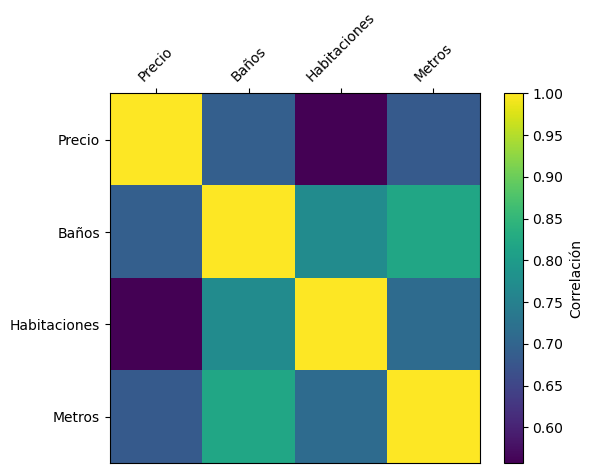

In [126]:
column_names_matriz = ['Precio', 'Baños', 'Habitaciones', 'Metros']
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='Correlación')
plt.xticks(range(len(column_names_matriz)), column_names_matriz, rotation=45)
plt.yticks(range(len(column_names_matriz)), column_names_matriz)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

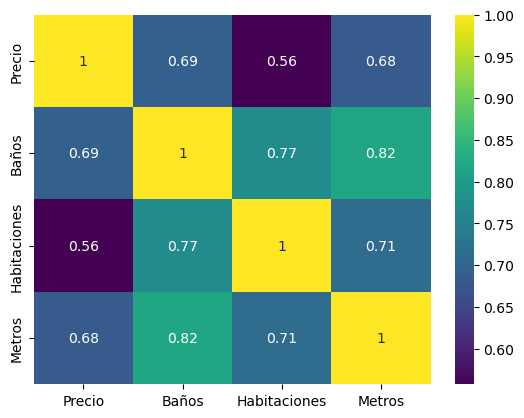

In [127]:
# Con seaborn
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names_matriz, yticklabels=column_names_matriz)

### Estandarización

In [130]:
# Guardamos los valores originales y los estandarizados en variables

# Media
price_mean = np.mean(price)
baths_mean = np.mean(baths)
roms_mean = np.mean(roms)
meters_mean = np.mean(meters)

# Mediana
price_median = np.median(price)
baths_median = np.median(baths)
roms_median = np.median(roms)
meters_median = np.median(meters)

# Desviacion estandar
price_std = np.std(price)
baths_std = np.std(baths)
roms_std = np.std(roms)
meters_std = np.std(meters)

In [135]:
# Estandarizamos

price_standard = (price - price_mean) / price_std
baths_standard = (baths - baths_mean) / baths_std
roms_standard = (roms - roms_mean) / roms_std
meters_standard = (meters - meters_mean) / meters_std

print(f"Precio estandarizado: {price_standard[:3]}")
print(f"Baños estandarizados: {baths_standard[:3]}")
print(f"Habitaciones estandarizadas: {roms_standard[:3]}")
print(f"Metros estandarizados: {meters_standard[:3]}")

Precio estandarizado: [0.60750979 0.67989849 0.00909659]
Baños estandarizados: [0.06117968 0.06117968 0.06117968]
Habitaciones estandarizadas: [-0.29760994 -0.29760994  0.32983959]
Metros estandarizados: [-0.17865826 -0.24649343  0.27531553]


In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) # Primer gráfico
plt.hist(city_consumption, bins=30, alpha=0.7, label='consumo original')
plt.hist(co2_emissions, bins=30, alpha=0.7, label='emisiones co2 original')
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2) # Segundo gráfico
plt.hist(city_consumption_standard, bins=30, alpha=0.7, label='consumo estandarizado')
plt.hist(co2_emissions_standard, bins=30, alpha=0.7, label='emisiones co2 estandarizadas')
plt.title("Distribuciones estandarizadas \n (mean = median = mode = 0, std = 1)")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend();

* Opcional: filtrar los barrios 20 % más baratos
* Opcional: Moda de los barrios más baratos y más caros